In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [23]:
pd.read_csv('resources/sample_submission.csv')

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5
...,...,...
106166,265422,0.5
106167,265423,0.5
106168,265424,0.5
106169,265425,0.5


Looking at the dataset

In [105]:
train_df = pd.read_csv('resources/train.csv')
train_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [6]:
train_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


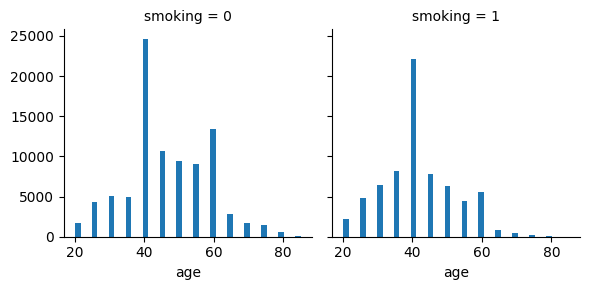

In [7]:
g = sns.FacetGrid(train_df, col='smoking')
g.map(plt.hist, 'age', bins=40)

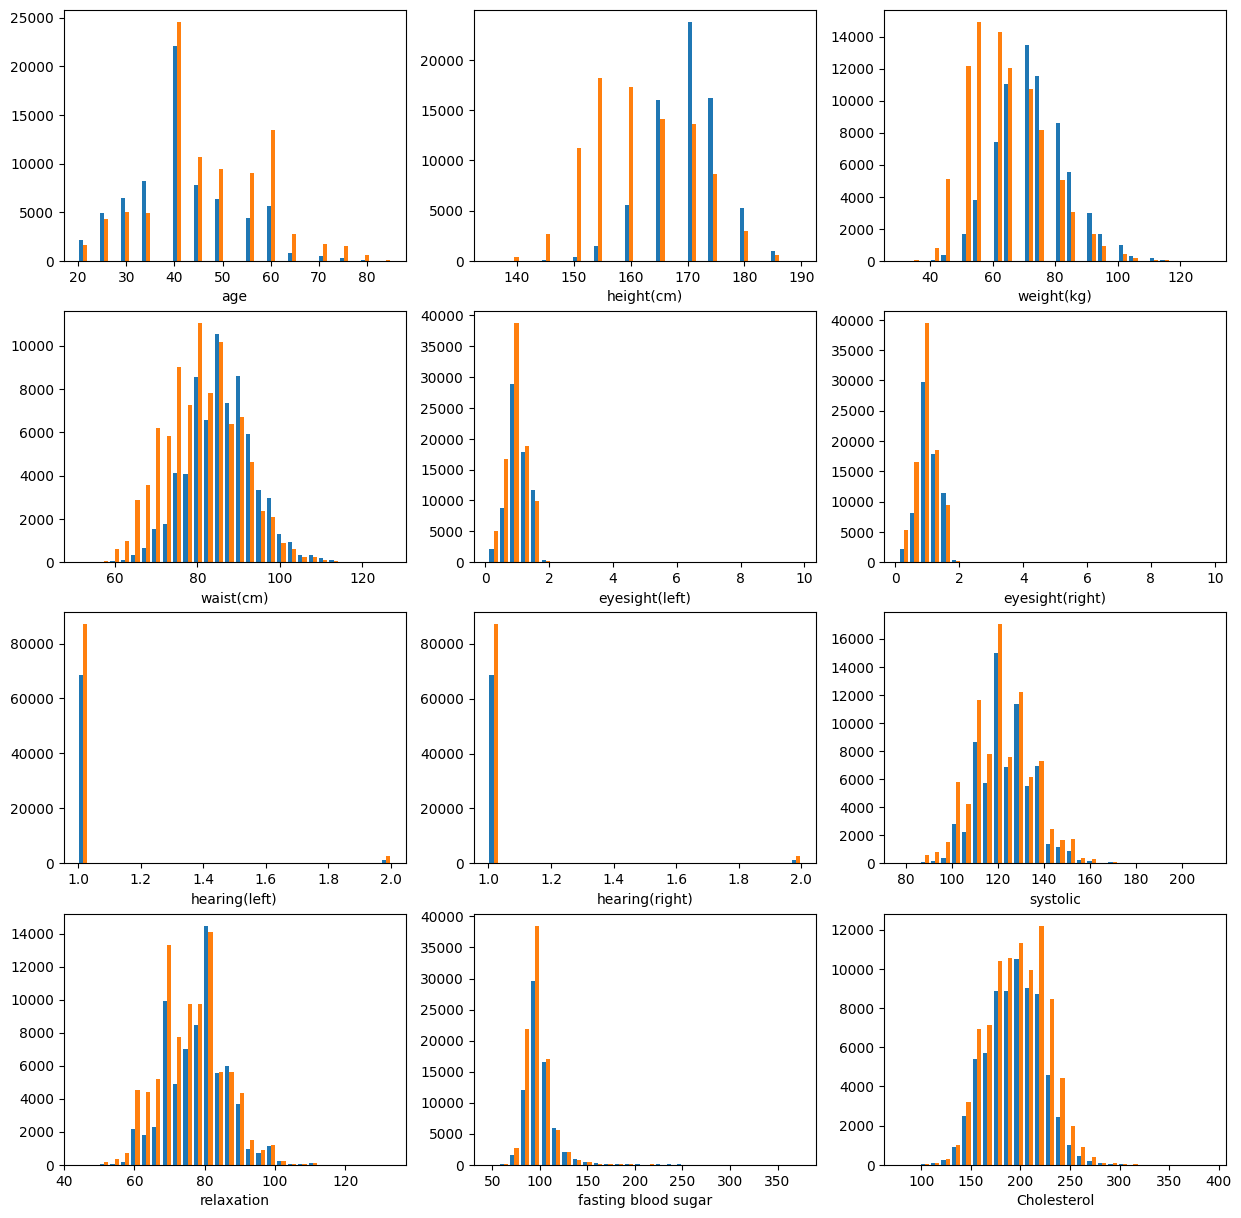

In [106]:
columns = train_df.drop(columns='id').columns[0:12]
df_plotting_smokers = train_df[train_df['smoking'] == 1]
df_plotting_non_smokers = train_df[train_df['smoking'] == 0]
# create a 3x3 grid of subplots, using tuple unpacking
fig, axs = plt.subplots(4,3,figsize=(15,15))
# plot the linear_data on the 5th subplot axes 
count = 0
for i in range(4) :
    for j in range(3) :
        
        axs[i][j].hist([list(df_plotting_smokers[columns[count]]),list(df_plotting_non_smokers[columns[count]])],bins=30)
        axs[i][j].set_xlabel(columns[count])
        count += 1

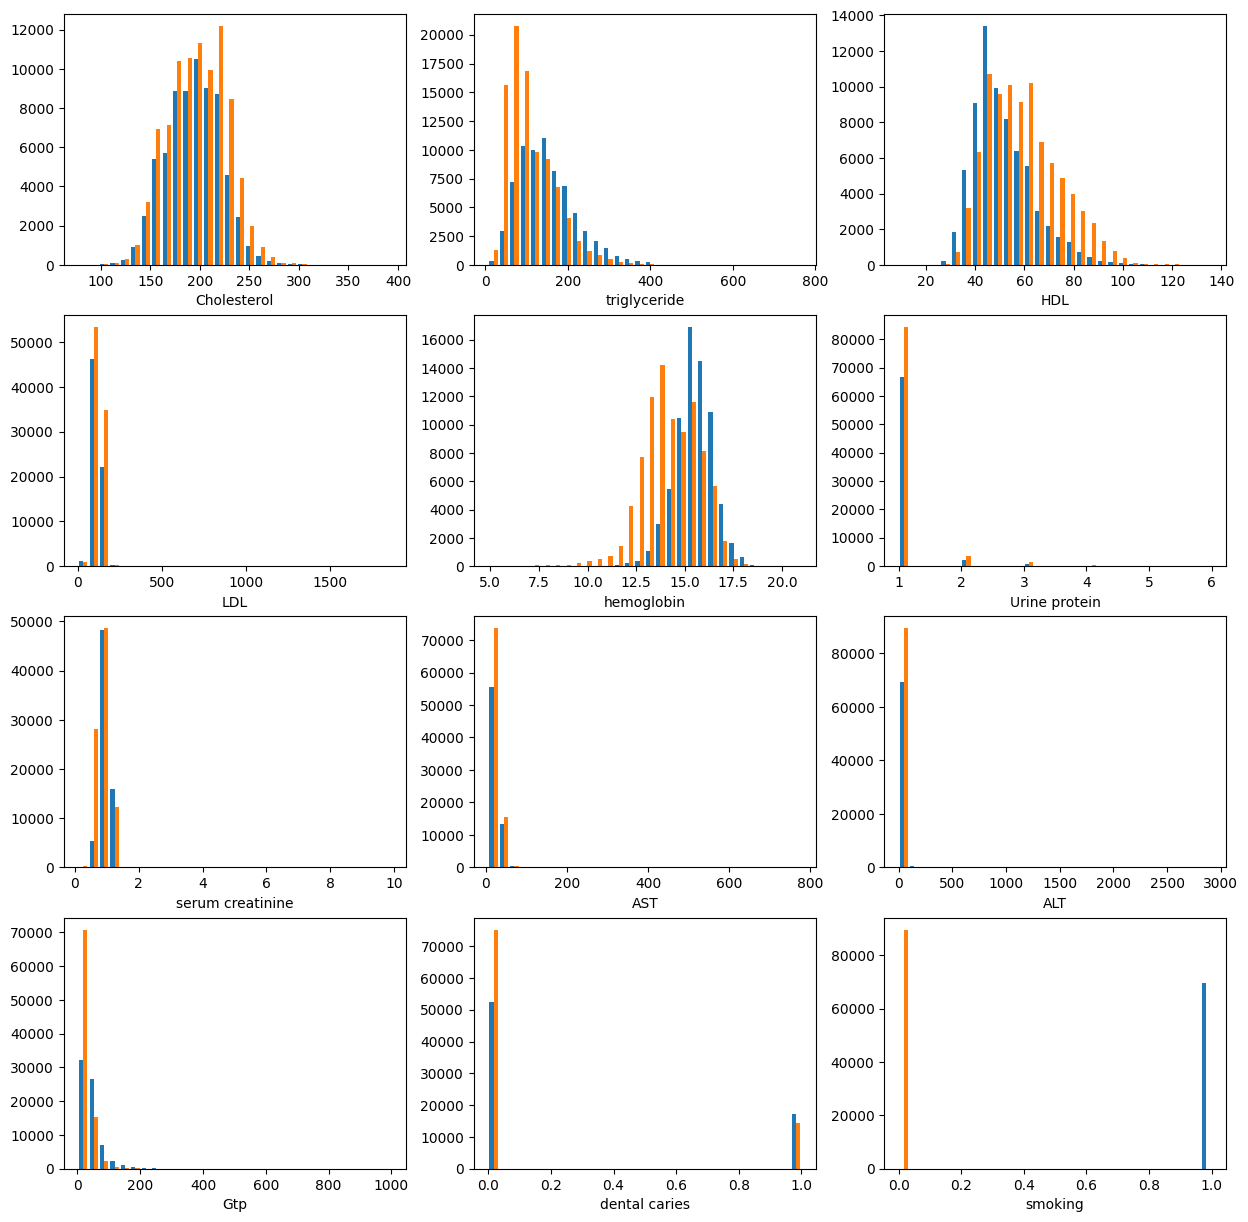

In [9]:
columns = train_df.drop(columns='id').columns[11:]
df_plotting_smokers = train_df[train_df['smoking'] == 1]
df_plotting_non_smokers = train_df[train_df['smoking'] == 0]
# create a 3x3 grid of subplots, using tuple unpacking
fig, axs = plt.subplots(4,3,figsize=(15,15))
# plot the linear_data on the 5th subplot axes 
count = 0
for i in range(4) :
    for j in range(3) :
        axs[i][j].hist([list(df_plotting_smokers[columns[count]]),list(df_plotting_non_smokers[columns[count]])],bins=30)
        axs[i][j].set_xlabel(columns[count])
        count += 1

In [10]:
train_df[["eyesight(right)", "smoking"]].groupby(['eyesight(right)'], as_index=False).mean().sort_values(by='smoking', ascending=False)

,eyesight(right),smoking
14,1.6,0.684211
13,1.5,0.544371
15,2.0,0.518657
12,1.4,0.500000
10,1.2,0.491268
9,1.0,0.456595
8,0.9,0.431516
7,0.8,0.362722
6,0.7,0.347250
11,1.3,0.333333


As we look at the visualization some of the features will not help us because of lacking the distribution need.
So we drop their columns.

In [108]:
train_df.drop(columns=['hearing(left)','hearing(right)','eyesight(left)','eyesight(right)','dental caries'
                       ,'Urine protein'],inplace=True)

In [109]:
#WARNING Look out running this cell
train_df.drop(columns=['id'],inplace=True)

now we will build our train and test data and scale the features by an scalar so their weights be equal

In [20]:
from sklearn.model_selection import train_test_split

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['smoking']),train_df['smoking'],random_state=12)

In [167]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forrest classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfclf = RandomForestClassifier().fit(X_train_scaled,y_train)

In [136]:
rfclf.score(X_test_scaled,y_test)

0.7706585623147636

Hist gradient Boosting Trees

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [225]:
hgclf = HistGradientBoostingClassifier(random_state=1,max_iter=300,learning_rate = 0.1,
                                                                   min_samples_leaf = 30,
                                                                   max_depth = 6).fit(X_train_scaled,y_train)

In [226]:
hgclf.score(X_test_scaled,y_test)

0.7781433666549455

Logistic Regression

from sklearn.linear_model import LogisticRegression

In [145]:
lgclf = LogisticRegression(max_iter=160000).fit(X_train_scaled,y_train)

In [146]:
lgclf.score(X_test_scaled,y_test)

0.745391068468378

Gaussian Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [150]:
GNBclf = GaussianNB().fit(X_train_scaled,y_train)

In [151]:
GNBclf.score(X_test_scaled,y_test)

0.7265283568593962

KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
knnclf = KNeighborsClassifier(n_neighbors=5,metric='cosine').fit(X_train_scaled,y_train)

In [215]:
knnclf.score(X_test_scaled,y_test)

0.710579193248606

from above models I'll choose the HIST and random forrest 

In [170]:
from sklearn.metrics import roc_curve, auc

max_depth = 1.000 learning_rate = 0.100  accuracy = 0.763   AUC = 0.848
max_depth = 1.000 learning_rate = 0.200  accuracy = 0.768   AUC = 0.853
max_depth = 1.000 learning_rate = 0.300  accuracy = 0.769   AUC = 0.853
max_depth = 1.000 learning_rate = 0.400  accuracy = 0.770   AUC = 0.853
max_depth = 1.000 learning_rate = 0.500  accuracy = 0.769   AUC = 0.854
max_depth = 1.000 learning_rate = 0.600  accuracy = 0.769   AUC = 0.854
max_depth = 1.000 learning_rate = 0.700  accuracy = 0.771   AUC = 0.854
max_depth = 1.000 learning_rate = 0.800  accuracy = 0.770   AUC = 0.854
max_depth = 1.000 learning_rate = 0.900  accuracy = 0.769   AUC = 0.852
max_depth = 1.000 learning_rate = 1.000  accuracy = 0.769   AUC = 0.853
max_depth = 2.000 learning_rate = 0.100  accuracy = 0.774   AUC = 0.858
max_depth = 2.000 learning_rate = 0.200  accuracy = 0.775   AUC = 0.861
max_depth = 2.000 learning_rate = 0.300  accuracy = 0.778   AUC = 0.863
max_depth = 2.000 learning_rate = 0.400  accuracy = 0.776   AUC 

Text(0.5, 1.0, 'ROC curve: (1-of-10 digits classifier)')

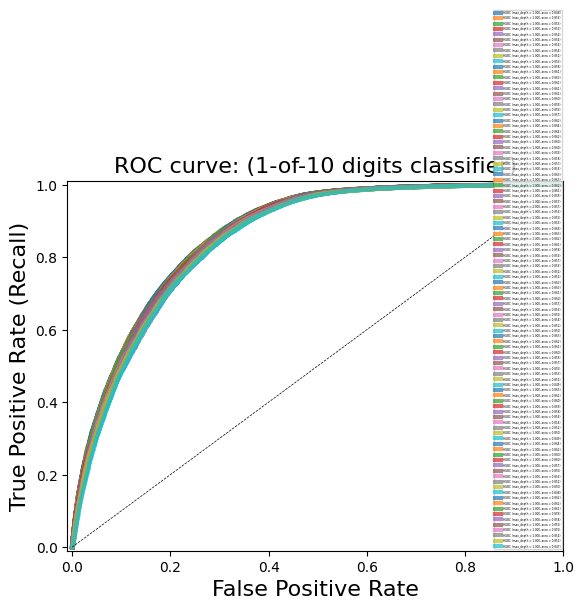

In [231]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for l2 in [1,2,3,4,5,6,7,8,9,10] :
    for lrate in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] :
        hgclf = HistGradientBoostingClassifier(max_depth=l2,learning_rate=lrate,max_iter=300,min_samples_leaf=30).fit(X_train_scaled,y_train)
        y_score_hgc = hgclf.decision_function(X_test_scaled)
        fpr_hgc, tpr_hgc, _ = roc_curve(y_test, y_score_hgc)
        roc_auc_hgc = auc(fpr_hgc, tpr_hgc)
        accuracy_hgc = hgclf.score(X_test_scaled, y_test)
        print("max_depth = {:.3f} learning_rate = {:.3f}  accuracy = {:.3f}   AUC = {:.3f}".format(l2,lrate, accuracy_hgc, 
                                                                    roc_auc_hgc))
        plt.plot(fpr_hgc, tpr_hgc, lw=3, alpha=0.7, 
             label='HGBC (max_depth = {:0.3f}, area = {:0.3f})'.format(l, roc_auc_hgc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=2)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

As we look the best parameters are max_depth of 5 and learning_rate of 0.1

max_iteration = 100.000 ,accuracy = 0.776   AUC = 0.8609
max_iteration = 200.000 ,accuracy = 0.777   AUC = 0.8634
max_iteration = 300.000 ,accuracy = 0.779   AUC = 0.8644
max_iteration = 400.000 ,accuracy = 0.779   AUC = 0.8647
max_iteration = 500.000 ,accuracy = 0.777   AUC = 0.8634
max_iteration = 600.000 ,accuracy = 0.778   AUC = 0.8638
max_iteration = 700.000 ,accuracy = 0.778   AUC = 0.8638
max_iteration = 800.000 ,accuracy = 0.777   AUC = 0.8632
max_iteration = 900.000 ,accuracy = 0.778   AUC = 0.8634
max_iteration = 1000.000 ,accuracy = 0.776   AUC = 0.8628


Text(0.5, 1.0, 'ROC curve: (1-of-10 digits classifier)')

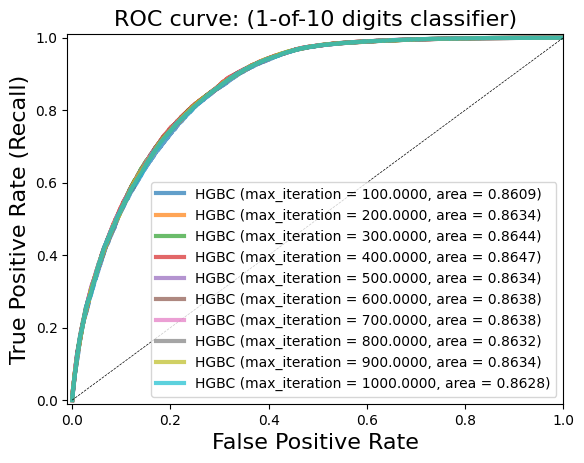

In [255]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for max_iteration in [100,200,300,400,500,600,700,800,900,1000] :
        hgclf = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,max_iter=max_iteration,min_samples_leaf=30).fit(X_train_scaled,y_train)
        y_score_hgc = hgclf.decision_function(X_test_scaled)
        fpr_hgc, tpr_hgc, _ = roc_curve(y_test, y_score_hgc)
        roc_auc_hgc = auc(fpr_hgc, tpr_hgc)
        accuracy_hgc = hgclf.score(X_test_scaled, y_test)
        print("max_iteration = {:.3f} ,accuracy = {:.3f}   AUC = {:.4f}".format(max_iteration, accuracy_hgc, 
                                                                    roc_auc_hgc))
        plt.plot(fpr_hgc, tpr_hgc, lw=3, alpha=0.7, 
             label='HGBC (max_iteration = {:0.4f}, area = {:0.4f})'.format(max_iteration, roc_auc_hgc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=10)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

leaves = 3.000 ,accuracy = 0.778   AUC = 0.8631
leaves = 6.000 ,accuracy = 0.777   AUC = 0.8634
leaves = 9.000 ,accuracy = 0.778   AUC = 0.8635
leaves = 12.000 ,accuracy = 0.778   AUC = 0.8639
leaves = 15.000 ,accuracy = 0.777   AUC = 0.8632
leaves = 18.000 ,accuracy = 0.777   AUC = 0.8622
leaves = 21.000 ,accuracy = 0.779   AUC = 0.8639
leaves = 24.000 ,accuracy = 0.779   AUC = 0.8635
leaves = 27.000 ,accuracy = 0.779   AUC = 0.8645
leaves = 30.000 ,accuracy = 0.777   AUC = 0.8645
leaves = 33.000 ,accuracy = 0.778   AUC = 0.8637
leaves = 36.000 ,accuracy = 0.779   AUC = 0.8649
leaves = 39.000 ,accuracy = 0.777   AUC = 0.8627


Text(0.5, 1.0, 'ROC curve: (1-of-10 digits classifier)')

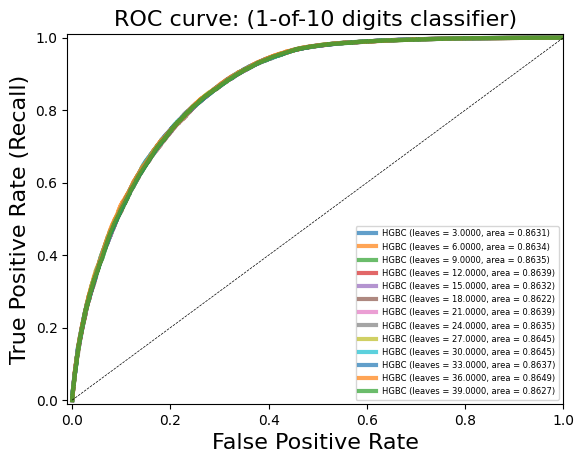

In [258]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for leaves in [3,6,9,12,15,18,21,24,27,30,33,36,39] :
        hgclf = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,max_iter=400,min_samples_leaf=leaves).fit(X_train_scaled,y_train)
        y_score_hgc = hgclf.decision_function(X_test_scaled)
        fpr_hgc, tpr_hgc, _ = roc_curve(y_test, y_score_hgc)
        roc_auc_hgc = auc(fpr_hgc, tpr_hgc)
        accuracy_hgc = hgclf.score(X_test_scaled, y_test)
        print("leaves = {:.3f} ,accuracy = {:.3f}   AUC = {:.4f}".format(leaves, accuracy_hgc, 
                                                                    roc_auc_hgc))
        plt.plot(fpr_hgc, tpr_hgc, lw=3, alpha=0.7, 
             label='HGBC (leaves = {:0.4f}, area = {:0.4f})'.format(leaves, roc_auc_hgc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=6)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

rnd = 0.000 ,accuracy = 0.777   AUC = 0.8635
rnd = 1.000 ,accuracy = 0.778   AUC = 0.8634
rnd = 2.000 ,accuracy = 0.778   AUC = 0.8637
rnd = 3.000 ,accuracy = 0.778   AUC = 0.8645
rnd = 4.000 ,accuracy = 0.779   AUC = 0.8638
rnd = 5.000 ,accuracy = 0.780   AUC = 0.8634
rnd = 6.000 ,accuracy = 0.778   AUC = 0.8637
rnd = 7.000 ,accuracy = 0.777   AUC = 0.8628
rnd = 8.000 ,accuracy = 0.778   AUC = 0.8632
rnd = 9.000 ,accuracy = 0.777   AUC = 0.8636
rnd = 10.000 ,accuracy = 0.777   AUC = 0.8635
rnd = 11.000 ,accuracy = 0.779   AUC = 0.8633
rnd = 12.000 ,accuracy = 0.777   AUC = 0.8625
rnd = 13.000 ,accuracy = 0.778   AUC = 0.8643


Text(0.5, 1.0, 'ROC curve: (1-of-10 digits classifier)')

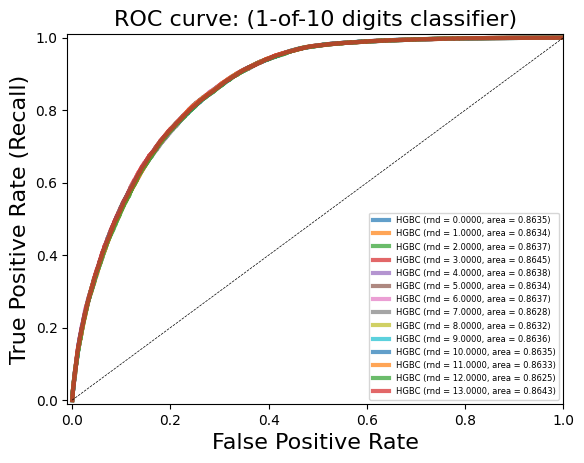

In [260]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for rnd in [0,1,2,3,4,5,6,7,8,9,10,11,12,13] :
        hgclf = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,max_iter=400,min_samples_leaf=30,random_state=rnd).fit(X_train_scaled,y_train)
        y_score_hgc = hgclf.decision_function(X_test_scaled)
        fpr_hgc, tpr_hgc, _ = roc_curve(y_test, y_score_hgc)
        roc_auc_hgc = auc(fpr_hgc, tpr_hgc)
        accuracy_hgc = hgclf.score(X_test_scaled, y_test)
        print("rnd = {:.3f} ,accuracy = {:.3f}   AUC = {:.4f}".format(rnd, accuracy_hgc, 
                                                                    roc_auc_hgc))
        plt.plot(fpr_hgc, tpr_hgc, lw=3, alpha=0.7, 
             label='HGBC (rnd = {:0.4f}, area = {:0.4f})'.format(rnd, roc_auc_hgc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=6)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

l2 = 0.100 ,accuracy = 0.778   AUC = 0.8644
l2 = 0.200 ,accuracy = 0.778   AUC = 0.8642
l2 = 0.300 ,accuracy = 0.778   AUC = 0.8643
l2 = 0.400 ,accuracy = 0.777   AUC = 0.8631
l2 = 0.500 ,accuracy = 0.777   AUC = 0.8635
l2 = 0.600 ,accuracy = 0.778   AUC = 0.8642
l2 = 0.700 ,accuracy = 0.777   AUC = 0.8639
l2 = 0.800 ,accuracy = 0.776   AUC = 0.8632
l2 = 0.900 ,accuracy = 0.778   AUC = 0.8646
l2 = 1.000 ,accuracy = 0.778   AUC = 0.8639
l2 = 1.100 ,accuracy = 0.776   AUC = 0.8633
l2 = 1.200 ,accuracy = 0.778   AUC = 0.8641


Text(0.5, 1.0, 'ROC curve: (1-of-10 digits classifier)')

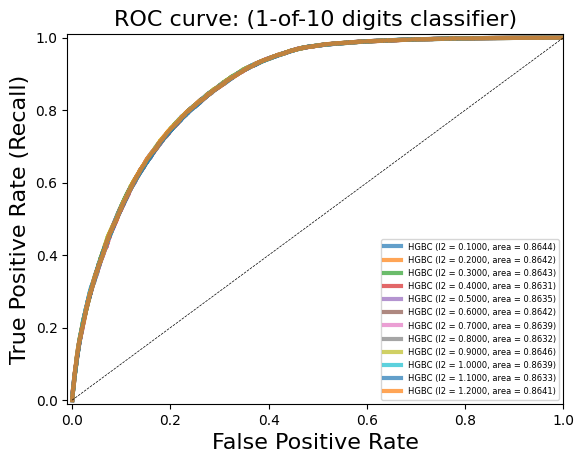

In [261]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for l2 in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2] :
        hgclf = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,max_iter=400,min_samples_leaf=30,
                                               random_state=3,l2_regularization=l2).fit(X_train_scaled,y_train)
        y_score_hgc = hgclf.decision_function(X_test_scaled)
        fpr_hgc, tpr_hgc, _ = roc_curve(y_test, y_score_hgc)
        roc_auc_hgc = auc(fpr_hgc, tpr_hgc)
        accuracy_hgc = hgclf.score(X_test_scaled, y_test)
        print("l2 = {:.3f} ,accuracy = {:.3f}   AUC = {:.4f}".format(l2, accuracy_hgc, 
                                                                    roc_auc_hgc))
        plt.plot(fpr_hgc, tpr_hgc, lw=3, alpha=0.7, 
             label='HGBC (l2 = {:0.4f}, area = {:0.4f})'.format(l2, roc_auc_hgc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=6)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
#plt.axes().set_aspect('equal')

In [262]:
hgclf = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,max_iter=400,
                                       min_samples_leaf=30,random_state=3,l2_regularization=0.9).fit(X_train_scaled,y_train)

getting ready the data for submission

In [263]:
test_df = pd.read_csv('resources/test.csv')
test_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [264]:
prediction_proba = pd.DataFrame({'smoking' : hgclf.predict_proba(scaler.transform(test_df.drop(columns=['id','hearing(left)',
                                                                                                        'hearing(right)',
                                                                                                        'eyesight(left)',
                                                                                                        'eyesight(right)',
                                                                                                        'dental caries',
                                                                                                        'Urine protein'])))[:,1]},index=test_df['id'])

In [265]:
prediction_proba.to_csv('models-predictions\HGBTclf_2.csv')